In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from tqdm import tqdm

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
img_org= cv2.imread('/content/gdrive/My Drive/'+my_data_dir+'/32/LB/IMG_6238_Fish32_bm_LB.JPG')

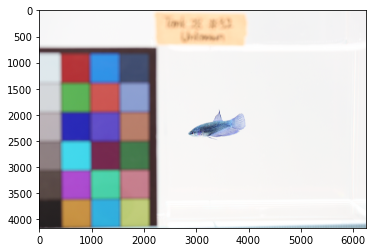

In [ ]:
plt.imshow(img_org)

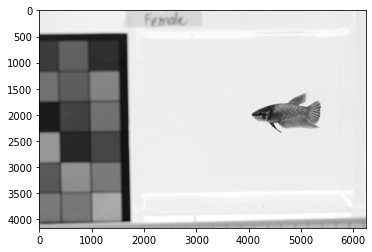

In [ ]:
img_gray= cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')

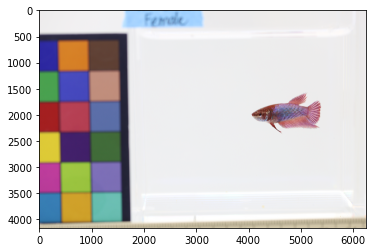

In [ ]:
img_RGB= cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)

In [ ]:
ret, thresh = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

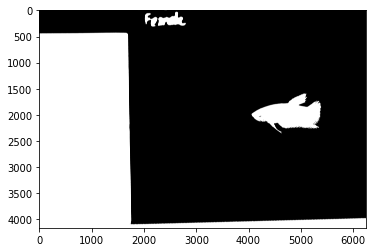

In [ ]:
plt.imshow(thresh, cmap = 'gray')

In [ ]:
def get_fish(file, threshold, style = 'org'):
  img_org = cv2.imread(file)
  # img_RGB= cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB) # Opencvuses BGR
  img_gray= cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY) # Gray image


  ret, thresh = cv2.threshold(img_gray, threshold, 255, 0)
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Get the contours

  if len(contours)==0:
    return img_org
  l = []
  for i in range(len(contours)):
    l.append(len(contours[i]))
  idx = l.index(max(l)) # Get the fish contour index

  mask = np.zeros_like(img_gray) # Create mask where white is what we want, black otherwise
  cv2.drawContours(mask, contours, idx, 255, -1) # Draw filled contour in mask
  out = np.zeros_like(img_org) # Extract out the object and place into output image
  out[mask == 255] = img_org[mask == 255]

  (y, x) = np.where(mask == 255)
  (topy, topx) = (np.min(y), np.min(x))
  (bottomy, bottomx) = (np.max(y), np.max(x))

  if style =='org':
    return img_org[topy:bottomy+1, topx:bottomx+1]
  if style =='black':
    return out[topy:bottomy+1, topx:bottomx+1]


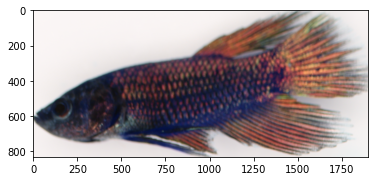

In [ ]:
plt.imshow(get_fish('/content/gdrive/My Drive/Fish_pics/119/IMG_1433.JPG', 175))

In [ ]:
cv2.imwrite('/content/gdrive/My Drive/capstone/sample_1433.jpg', cv2.cvtColor(get_fish('/content/gdrive/My Drive/Fish_pics/119/IMG_1433.JPG', 175), cv2.COLOR_RGB2BGR))

True

In [ ]:
def best_fish(file, threshold_list, style = 'org'):
  res = []
  all = []
  for thre in threshold_list:
    temp = get_fish(file, thre, style)
    all.append(temp)
    if temp.shape[0]<1500 and temp.shape[0]>350 and temp.shape[1]<2000 and temp.shape[1]>650:
    # if temp.shape[0]<3000 and temp.shape[0]>200 and temp.shape[1]<3000 and temp.shape[1]>500:
      res.append(temp)
  if res==[]:
    return min(all, key=lambda x:(abs(x.shape[0]-1000)+abs(x.shape[1]-1500)))
  else:
    # return max(res, key=lambda x:(x.shape[0]+x.shape[1]))
    return res[-1]


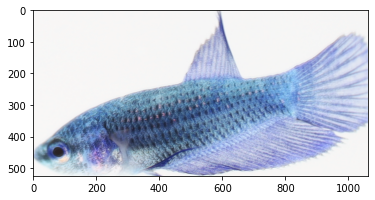

In [ ]:
plt.imshow(best_fish('/content/gdrive/My Drive/'+my_data_dir+'/32/LB/IMG_6238_Fish32_bm_LB.JPG', [100,125,150,175,200]))

In [ ]:
# search all the LB&RB photos
def get_LR(dir):
  file_list = []
  for file1 in os.listdir(dir):
    path1 = os.path.join(dir, file1)
    # print(path, file1)
    if os.path.isdir(path1):
      for file2 in os.listdir(path1):
        path2 = os.path.join(path1, file2)
        if os.path.isdir(path2) and (file2 in ['LB','RB']):
          for file3 in os.listdir(path2):
            if file3.endswith('.JPG'):
              file_list.append((file3,os.path.join(path2,file3)))
              
  return file_list


In [ ]:
def get_path(dir, nlist):
  file_list = []
  for file1 in os.listdir(dir):
    path1 = os.path.join(dir, file1)
    # print(path, file1)
    if os.path.isdir(path1):
      for file2 in os.listdir(path1):
        path2 = os.path.join(path1, file2)
        if os.path.isdir(path2):
          for file3 in os.listdir(path2):
            if file3 in nlist:
              file_list.append((file3,os.path.join(path2,file3)))
              print()
              cv2.imwrite(os.path.join('/content/gdrive/My Drive/test2_cut/',file3), cv2.cvtColor(best_fish(os.path.join(path2,file3), [100,125,150,175,200]), cv2.COLOR_RGB2BGR))
  return file_list


In [ ]:
def get_fish_pic(dir):
  to = '/content/gdrive/My Drive/fishpic_rest_cut/'
  i=0
  for file1 in tqdm(os.listdir(dir)):
    if file1 == '11':
      i=1
    if i==0:
      continue
    print(file1)
    try:
      os.mkdir(os.path.join(to, file1))
    except:
      pass
    # os.mkdir(to + file1)
    path1 = os.path.join(dir, file1)
    for file2 in os.listdir(path1):

      cv2.imwrite(os.path.join(os.path.join(to, file1),file2), best_fish(os.path.join(path1, file2), [100,125,150,175,200,225,245]))
    # cv2.imwrite(os.path.join('/content/gdrive/My Drive/fish_pic_cut/',file1.replace('tif','png')), cv2.cvtColor(best_fish(path1, [100,125,150,175,200,225]), cv2.COLOR_RGB2BGR))
  return 0

In [ ]:
get_fish_pic('/content/gdrive/My Drive/fishpics_rest_result')

  0%|          | 0/48 [00:00<?, ?it/s]

11


 23%|██▎       | 11/48 [06:24<21:33, 34.97s/it]

111


 25%|██▌       | 12/48 [11:41<1:11:46, 119.64s/it]

13


 27%|██▋       | 13/48 [19:17<2:08:32, 220.36s/it]

16


 29%|██▉       | 14/48 [24:55<2:24:50, 255.59s/it]

12


 31%|███▏      | 15/48 [31:05<2:39:36, 290.19s/it]

14


 33%|███▎      | 16/48 [40:04<3:14:33, 364.79s/it]

2


 35%|███▌      | 17/48 [44:37<2:54:15, 337.27s/it]

20


 38%|███▊      | 18/48 [49:04<2:38:06, 316.21s/it]

21


 40%|███▉      | 19/48 [58:03<3:05:02, 382.86s/it]

24


 42%|████▏     | 20/48 [1:07:41<3:26:00, 441.43s/it]

30


 44%|████▍     | 21/48 [1:12:31<2:58:13, 396.07s/it]

34


 46%|████▌     | 22/48 [1:20:51<3:05:05, 427.14s/it]

32


 48%|████▊     | 23/48 [1:26:55<2:50:04, 408.17s/it]

33


 50%|█████     | 24/48 [1:31:18<2:25:52, 364.70s/it]

29


 52%|█████▏    | 25/48 [1:36:21<2:12:45, 346.31s/it]

37


 54%|█████▍    | 26/48 [1:43:07<2:13:33, 364.23s/it]

4


 56%|█████▋    | 27/48 [1:48:28<2:02:55, 351.21s/it]

39


 58%|█████▊    | 28/48 [1:55:03<2:01:27, 364.35s/it]

58


 60%|██████    | 29/48 [1:56:10<1:27:04, 274.95s/it]

52


 62%|██████▎   | 30/48 [2:06:46<1:54:59, 383.33s/it]

65 or 68?


 65%|██████▍   | 31/48 [2:15:37<2:01:08, 427.57s/it]

6


 67%|██████▋   | 32/48 [2:23:37<1:58:16, 443.52s/it]

62


 69%|██████▉   | 33/48 [2:29:12<1:42:45, 411.00s/it]

59


 71%|███████   | 34/48 [2:35:14<1:32:25, 396.12s/it]

7


 73%|███████▎  | 35/48 [2:43:28<1:32:13, 425.62s/it]

67


 75%|███████▌  | 36/48 [2:48:56<1:19:14, 396.19s/it]

69


 77%|███████▋  | 37/48 [2:59:44<1:26:31, 471.91s/it]

66


 79%|███████▉  | 38/48 [3:05:05<1:11:04, 426.47s/it]

77


 81%|████████▏ | 39/48 [3:11:22<1:01:44, 411.60s/it]

71


 83%|████████▎ | 40/48 [3:20:35<1:00:32, 454.09s/it]

73


 85%|████████▌ | 41/48 [3:21:14<38:27, 329.57s/it]  

88


 88%|████████▊ | 42/48 [3:27:45<34:48, 348.00s/it]

83


 90%|████████▉ | 43/48 [3:34:45<30:48, 369.63s/it]

82


 92%|█████████▏| 44/48 [3:39:58<23:30, 352.62s/it]

86


 94%|█████████▍| 45/48 [3:46:31<18:14, 364.86s/it]

84


 96%|█████████▌| 46/48 [3:51:11<11:18, 339.27s/it]

99?


 98%|█████████▊| 47/48 [3:59:01<06:18, 378.62s/it]

97?


100%|██████████| 48/48 [4:12:24<00:00, 315.51s/it]


In [ ]:
def get_rb_rest(dir):
  to = '/content/gdrive/My Drive/f2_rest_cut/'
  res = []
  i=0
  for f in os.listdir(to):
    res.append(f)
  for file1 in tqdm(os.listdir(dir)):
    i+=1
    print(i)
    fish_n = file1.split('_')[1]
    if fish_n not in ['160b','161b','162b','163b','207b']:
      continue
    print(fish_n)
    if fish_n not in res:
      try:
        os.mkdir(os.path.join(to, fish_n))
      except:
        pass
    res.append(fish_n)
    path1 = os.path.join(dir, file1)
    for file2 in os.listdir(path1):
      print(file2)
      cv2.imwrite(os.path.join(os.path.join(to, fish_n),file2), best_fish(os.path.join(path1, file2), [100,125,150,175,200,225,245]))
    # cv2.imwrite(os.path.join('/content/gdrive/My Drive/fish_pic_cut/',file1.replace('tif','png')), cv2.cvtColor(best_fish(path1, [100,125,150,175,200,225]), cv2.COLOR_RGB2BGR))
  return 0

In [ ]:
ttt = get_rb_rest('/content/gdrive/My Drive/f2_rb_result')

  0%|          | 0/103 [00:00<?, ?it/s]

1
161b
IMG_5066_CR3_97.png
IMG_5074_CR3_.png
IMG_5085_CR3_.png
IMG_5087_CR3_.png
IMG_5088_CR3_.png
IMG_5089_CR3_.png
IMG_5108_CR3_.png
IMG_5110_CR3_.png
IMG_5109_CR3_.png
IMG_5111_CR3_.png
IMG_5112_CR3_.png
1_IMG_5067_CR3_.png
1_IMG_5068_CR3_.png
1_IMG_5069_CR3_.png
1_IMG_5070_CR3_.png
1_IMG_5071_CR3_.png
1_IMG_5072_CR3_97.png
1_IMG_5073_CR3_97.png
1_IMG_5075_CR3_.png
1_IMG_5076_CR3_.png
1_IMG_5077_CR3_.png
1_IMG_5078_CR3_.png
1_IMG_5079_CR3_.png
1_IMG_5080_CR3_.png
1_IMG_5081_CR3_.png
1_IMG_5082_CR3_.png
1_IMG_5090_CR3_97.png
1_IMG_5091_CR3_97.png
1_IMG_5092_CR3_.png
1_IMG_5093_CR3_.png
1_IMG_5094_CR3_97.png
1_IMG_5095_CR3_97.png
1_IMG_5096_CR3_.png
1_IMG_5097_CR3_97.png
1_IMG_5098_CR3_97.png
1_IMG_5099_CR3_97.png
1_IMG_5100_CR3_97.png
1_IMG_5101_CR3_.png
1_IMG_5102_CR3_.png
1_IMG_5103_CR3_.png
1_IMG_5104_CR3_.png
1_IMG_5105_CR3_.png
1_IMG_5106_CR3_.png
1_IMG_5107_CR3_.png


  1%|          | 1/103 [09:09<15:33:21, 549.03s/it]

2
3
160b
IMG_5035_CR3_.png
IMG_5050_CR3_.png
IMG_5051_CR3_.png
IMG_5057_CR3_.png
IMG_5064_CR3_.png
IMG_5065_CR3_.png
1_IMG_5036_CR3_98.png
1_IMG_5037_CR3_.png
1_IMG_5038_CR3_98.png
1_IMG_5039_CR3_.png
1_IMG_5040_CR3_.png
1_IMG_5041_CR3_.png
1_IMG_5042_CR3_.png
1_IMG_5043_CR3_.png
1_IMG_5044_CR3_.png
1_IMG_5045_CR3_.png
1_IMG_5046_CR3_.png
1_IMG_5047_CR3_.png
1_IMG_5048_CR3_97.png
1_IMG_5052_CR3_97.png
1_IMG_5053_CR3_.png
1_IMG_5054_CR3_.png
1_IMG_5055_CR3_.png
1_IMG_5056_CR3_.png
1_IMG_5058_CR3_.png
1_IMG_5059_CR3_.png
1_IMG_5060_CR3_.png
1_IMG_5061_CR3_.png
1_IMG_5062_CR3_.png
1_IMG_5063_CR3_.png


  3%|▎         | 3/103 [15:15<12:12:11, 439.31s/it]

4
162b
IMG_5113 (1)_CR3_.png
IMG_5113_CR3_.png
IMG_5120 (1)_CR3_.png
IMG_5120_CR3_.png
IMG_5125 (1)_CR3_.png
IMG_5126 (1)_CR3_.png
IMG_5127 (1)_CR3_.png
IMG_5128 (1)_CR3_.png
IMG_5129 (1)_CR3_.png
IMG_5130 (1)_CR3_.png
IMG_5131 (1)_CR3_.png
1_IMG_5114 (1)_CR3_.png
1_IMG_5114_CR3_.png
1_IMG_5115 (1)_CR3_.png
1_IMG_5115_CR3_.png
1_IMG_5116 (1)_CR3_97.png
1_IMG_5116_CR3_97.png
1_IMG_5117 (1)_CR3_.png
1_IMG_5117_CR3_.png
1_IMG_5118 (1)_CR3_.png
1_IMG_5118_CR3_.png
1_IMG_5119 (1)_CR3_.png
1_IMG_5119_CR3_.png
1_IMG_5121 (1)_CR3_.png
1_IMG_5121_CR3_.png
1_IMG_5122 (1)_CR3_.png
1_IMG_5122_CR3_.png
1_IMG_5123 (1)_CR3_.png
1_IMG_5123_CR3_.png
1_IMG_5124 (1)_CR3_.png
1_IMG_5124_CR3_.png
1_IMG_5125_CR3_.png
1_IMG_5126_CR3_.png
1_IMG_5127_CR3_.png
1_IMG_5128_CR3_.png
1_IMG_5129_CR3_.png
1_IMG_5130_CR3_.png
1_IMG_5131_CR3_.png


  4%|▍         | 4/103 [22:14<11:54:35, 433.09s/it]

5
207b
IMG_1341_CR3_.png
IMG_1353_CR3_.png
IMG_1354_CR3_.png
IMG_1355_CR3_.png
1_IMG_1340_CR3_.png
1_IMG_1339_CR3_.png
1_IMG_1332_CR3_.png
1_IMG_1333_CR3_.png
1_IMG_1334_CR3_.png
1_IMG_1335_CR3_.png
1_IMG_1336_CR3_.png
1_IMG_1337_CR3_.png
1_IMG_1338_CR3_.png


  5%|▍         | 5/103 [24:13<9:13:33, 338.91s/it] 

6
163b
IMG_5132_CR3_.png
IMG_5143_CR3_.png
IMG_5158_CR3_.png
IMG_5159_CR3_.png
1_IMG_5133_CR3_.png
1_IMG_5134_CR3_.png
1_IMG_5135_CR3_.png
1_IMG_5136_CR3_.png
1_IMG_5137_CR3_.png
1_IMG_5138_CR3_.png
1_IMG_5139_CR3_.png
1_IMG_5140_CR3_.png
1_IMG_5141_CR3_.png
1_IMG_5142_CR3_.png
1_IMG_5144_CR3_98.png
1_IMG_5145_CR3_.png
1_IMG_5146_CR3_98.png
1_IMG_5147_CR3_.png
1_IMG_5148_CR3_.png
1_IMG_5149_CR3_.png
1_IMG_5150_CR3_.png
1_IMG_5151_CR3_.png
1_IMG_5152_CR3_.png
1_IMG_5153_CR3_.png
1_IMG_5154_CR3_.png
1_IMG_5155_CR3_.png
1_IMG_5156_CR3_.png
1_IMG_5157_CR3_.png


100%|██████████| 103/103 [29:49<00:00, 17.37s/it] 

7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103


100%|██████████| 30/30 [08:07<00:00, 16.25s/it]


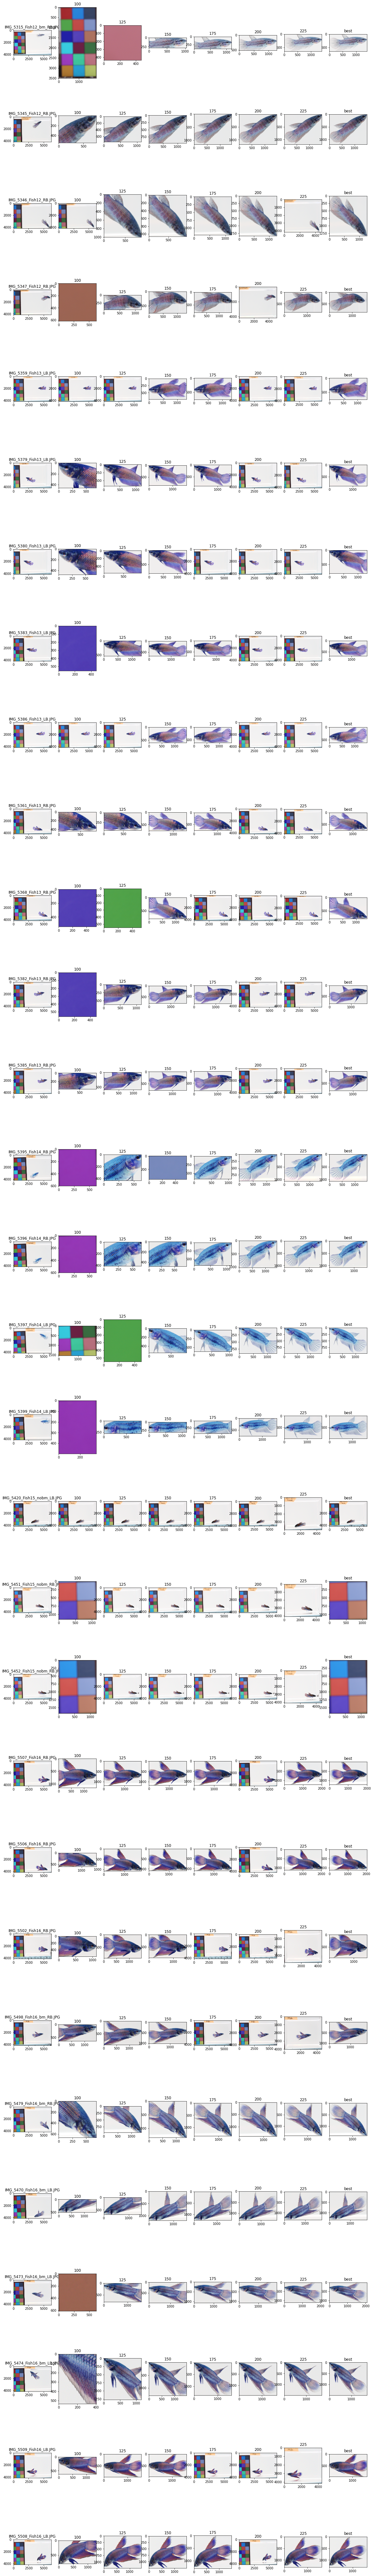

In [ ]:
n=30
# plt.figure(figsize=(20,250))
plt.figure(figsize=(20,150))
for i,j in enumerate(tqdm(range(n*2,n*3))):
  origin_photo = plt.subplot(n,8,8*i+1)
  plt.imshow(cv2.imread(fish_list[j][1]))
  origin_photo.set_title(fish_list[j][0])
  for ind,thresh in enumerate([100,125,150,175,200,225]):
    a = plt.subplot(n,8,8*i+ind+2)
    plt.imshow(get_fish(fish_list[j][1],thresh))
    # plt.title(thresh, y=-1)
    a.set_title(thresh)
  best_photo = plt.subplot(n,8,8*i+8)
  plt.imshow(best_fish(fish_list[j][1],[100,125,150,175,200,225]))
  best_photo.set_title('best')
  # plt.title(fish_list[i][0])